**Bank Customer Attrition Analysis**

This notebook delves into the "Bank Customer Churn" dataset to examine customer attrition and uncover insights that can aid the bank in enhancing its customer retention strategies. Customer churn refers to the situation where customers end their relationship with a company or cease using its services. Recognizing the factors leading to churn is vital for businesses to retain clients and ensure sustained profitability.

The dataset utilized in this analysis includes details about bank customers, such as demographic information, credit score, account balance, tenure, and other attributes. The target variable, "Exited," indicates whether a customer has churned (1) or remained (0). By exploring the data and conducting analysis, feature engineering, and predictive modeling, we aim to identify patterns and factors related to customer attrition.

This notebook covers the following key steps:

1. **Data Loading and Exploration**: Load the dataset and carry out an initial review to understand its structure, feature types, and any missing data.
  
2. **Exploratory Data Analysis (EDA)**: Perform a thorough analysis of the dataset, using visualizations and statistical summaries to uncover the distribution and relationships between variables.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier

# Load the dataset
data = pd.read_csv('Downloads/Customer-Churn-Records.csv')

# Display the first few rows of the dataset
print(data.head())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  Complain  Satisfaction Score Card Type  \
0        101348.88       1         1                   2   DIAMOND   
1        112542.58

In [4]:
data.shape

(10000, 18)

In [5]:
print(data.columns)

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')


In [7]:
# Check the data types of each column
print(data.dtypes)

RowNumber               int64
CustomerId              int64
Surname                object
CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object


In [9]:
# Check for missing values
print(data.isnull().sum())

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64


In [10]:
# Summary statistics
print(data.describe())

         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000     

# Data visualization

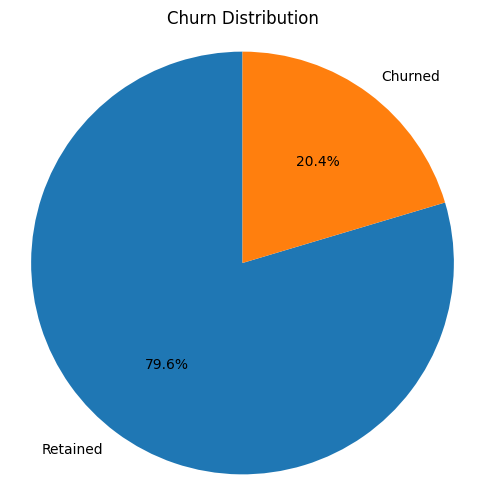

In [11]:
# Churn distribution
plt.figure(figsize=(6, 6))
churn_counts = data['Exited'].value_counts()
plt.pie(churn_counts, labels=['Retained', 'Churned'], autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Churn Distribution')
plt.show()

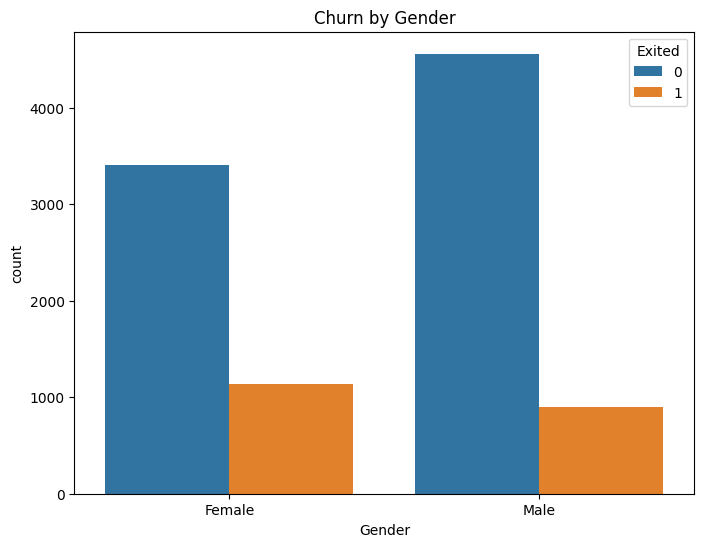

In [12]:
# Churn by gender
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', hue='Exited', data=data)
plt.title('Churn by Gender')
plt.show()

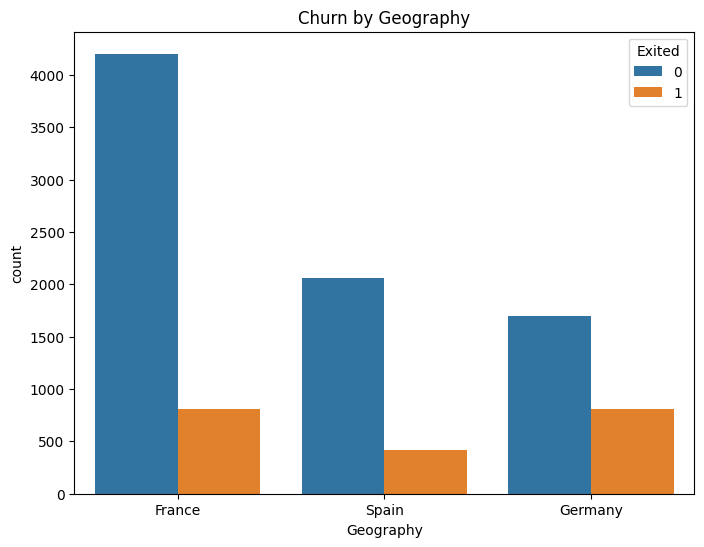

In [13]:
# Churn by geography
plt.figure(figsize=(8, 6))
sns.countplot(x='Geography', hue='Exited', data=data)
plt.title('Churn by Geography')
plt.show()

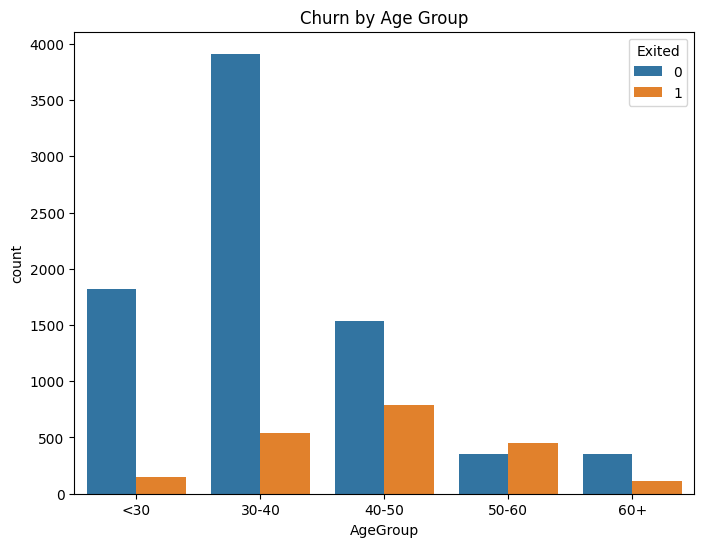

In [14]:
# Churn by age group
data['AgeGroup'] = pd.cut(data['Age'], bins=[0, 30, 40, 50, 60, np.inf], labels=['<30', '30-40', '40-50', '50-60', '60+'])
plt.figure(figsize=(8, 6))
sns.countplot(x='AgeGroup', hue='Exited', data=data)
plt.title('Churn by Age Group')
plt.show()

# Insights

In [15]:
# Churn rate by gender
churn_rate_gender = data.groupby('Gender')['Exited'].mean()
print(churn_rate_gender)

Gender
Female    0.250715
Male      0.164743
Name: Exited, dtype: float64


Based on the dataset, the churn rates by gender are as follows:

- **Female:** 25.1%
- **Male:** 16.5%

This indicates that female customers have a higher churn rate (25.1%) compared to male customers (16.5%).

In [16]:
# Churn rate by geography
churn_rate_geography = data.groupby('Geography')['Exited'].mean()
print(churn_rate_geography)

Geography
France     0.161747
Germany    0.324432
Spain      0.166734
Name: Exited, dtype: float64


Based on the dataset, the churn rates by geography are as follows:

- **France:** 16.2%
- **Germany:** 32.4%
- **Spain:** 16.7%

This shows that the churn rate is highest in Germany (32.4%), followed by Spain (16.7%) and France (16.2%).

In [20]:
# Churn rate by age group
churn_rate_age = data.groupby('AgeGroup', observed=False)['Exited'].mean()
print(churn_rate_age)

AgeGroup
<30      0.075203
30-40    0.121096
40-50    0.339655
50-60    0.562108
60+      0.247845
Name: Exited, dtype: float64


Based on the dataset, the churn rates by age group are as follows:

- **<30:** 7.5%
- **30-40:** 12.1%
- **40-50:** 33.9%
- **50-60:** 56.2%
- **60+:** 24.8%

These rates indicate that the highest churn occurs in the 50-60 age group (56.2%), followed by the 40-50 age group (33.9%). The lowest churn rate is found in the under 30 age group (7.5%).

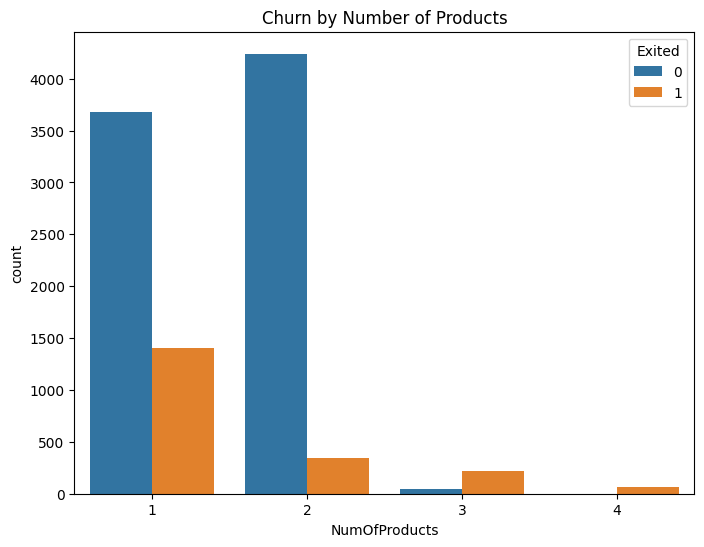

In [21]:
# Churn by Number of Products:
plt.figure(figsize=(8, 6))
sns.countplot(x='NumOfProducts', hue='Exited', data=data)
plt.title('Churn by Number of Products')
plt.show()

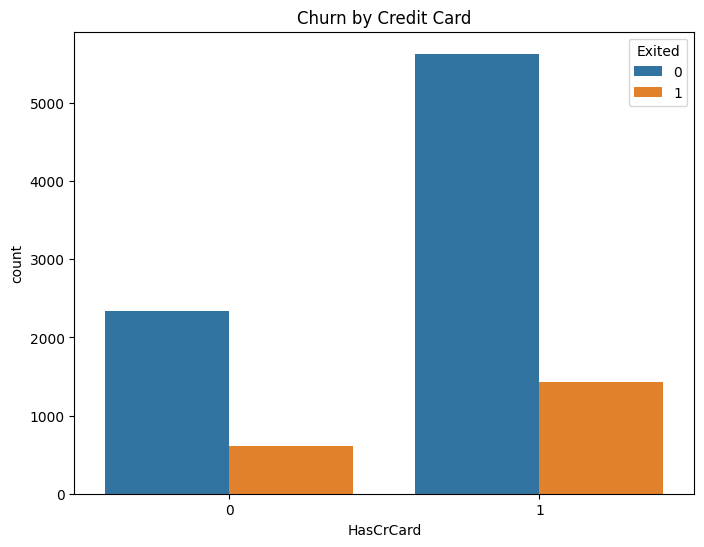

In [22]:
# Churn by Credit Card
plt.figure(figsize=(8, 6))
sns.countplot(x='HasCrCard', hue='Exited', data=data)
plt.title('Churn by Credit Card')
plt.show()

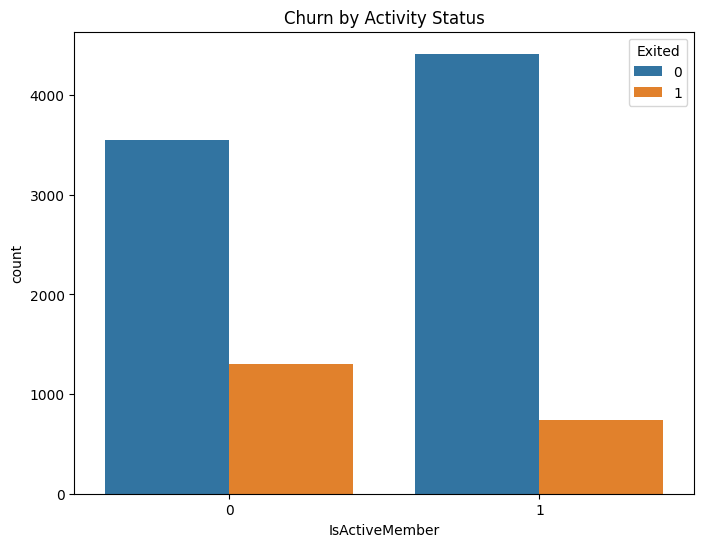

In [23]:
# Churn by Activity Status
plt.figure(figsize=(8, 6))
sns.countplot(x='IsActiveMember', hue='Exited', data=data)
plt.title('Churn by Activity Status')
plt.show()

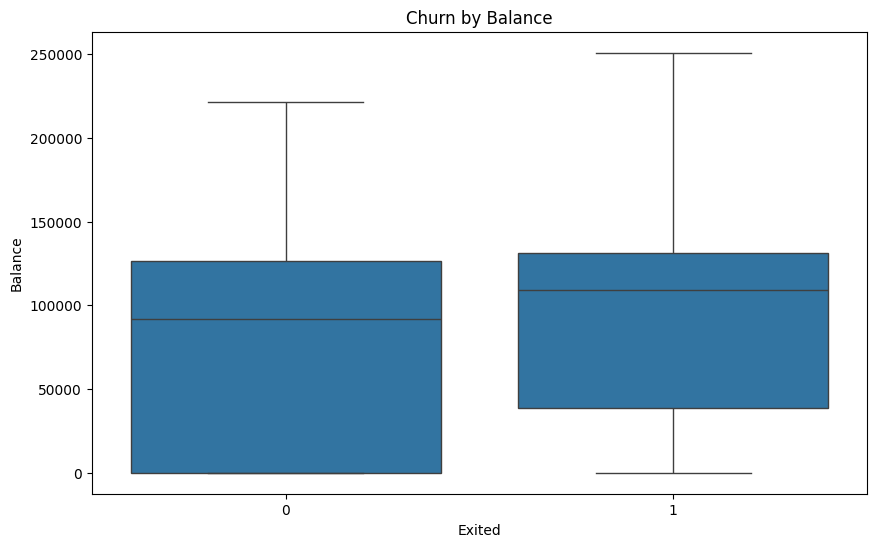

In [24]:
# Churn by Balance:

plt.figure(figsize=(10, 6))
sns.boxplot(x='Exited', y='Balance', data=data)
plt.title('Churn by Balance')
plt.show()

### EDA Insights

**Gender and Churn:**
The churn rate is higher for female customers (25.1%) compared to male customers (16.5%), indicating that gender may influence customer churn, with female customers being more likely to leave.

- **Recommendation**: Implement targeted marketing campaigns specifically for female customers to reduce their churn rate. For instance, offering vouchers for beauty products after maintaining the bank's products for a certain period could help enhance female customer retention.

**Geography and Churn:**
Churn rates vary by geographic location. Germany has the highest churn rate at 32.4%, followed by Spain at 16.7%, and France at 16.2%. This suggests that location plays a role in customer churn, with customers in Germany more likely to churn.

- **Recommendation**: To reduce churn in Germany, conduct localized customer satisfaction surveys to understand pain points and offer customized loyalty programs. Consider introducing special incentives such as financial planning consultations or rewards based on customer preferences and behaviors in that region.

**Age Group and Churn:**
Age significantly affects churn rates. The 50-60 age group has the highest churn rate at 56.2%, followed by the 40-50 age group at 33.9%. The lowest churn rate is in the under-30 age group at 7.5%, indicating older customers are more likely to churn than younger ones.

- **Recommendation**: Older customers may face difficulties using digital banking platforms. Provide tailored assistance and dedicated customer service to these age groups, offering help with online banking tools to improve their experience and reduce churn.

**Number of Products and Churn:**
The number of products a customer holds can impact churn. Customers with fewer products may have lower churn rates, while those with more products may have higher churn. Further analysis is needed to clarify this relationship.

- **Recommendation**: Enhance the app/website dashboard to clearly display the list of products each customer holds, encouraging them to engage with additional products and making it easier to explore new services.

**Credit Card and Churn:**
Credit card ownership does not significantly affect customer churn, with similar churn rates observed for customers with and without credit cards. Therefore, having a credit card is not a strong predictor of churn.

**Activity Status and Churn:**
Customer activity status is a key factor. Active customers show lower churn rates compared to inactive ones, suggesting that higher engagement leads to better retention.

- **Recommendation**: Develop strategies to increase customer engagement, such as personalized notifications or exclusive offers for active members. Focus on volatile groups, like older customers and females, to boost retention.

**Balance and Churn:**
Account balance does not show a strong correlation with churn in its current analysis. Further exploration and feature engineering may be needed to uncover more meaningful insights.

